<a href="https://colab.research.google.com/github/Suchitra-V31/OPENCV/blob/main/Flower_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Flower Recognition**

In this we are going to predict the class name of the flower from the dataset.

The dataset consists of various flower images.

The images are divided into 5 classes - chamomile, tulip, rose, sunflower, dandelion.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us import all the necessary libraries...

In [9]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras


In [10]:
#Encoding and split the data into train/test
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [11]:
#CNN model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [12]:
#data
data_path='/content/drive/MyDrive/Datasets/Flowers/flowers'

In [13]:
data=[]
label=[]
for folder in os.listdir(data_path):  #os.listdir() method in python is used to get the list of all files and directories in the specified directory.
  for file in os.listdir(os.path.join(data_path,folder)):  # Python os. path. join method combines one or more path names into a single path.
    if file.endswith('jpg'):
      label.append(folder)
      img=cv2.imread(os.path.join(data_path,folder,file)) 
      img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      img_resize=cv2.resize(img_rgb,(128,128))
      data.append(img_resize)
    else:
      continue



In [14]:
# convert data into numerical values
num_data=np.array(data)
num_label=np.array(label)

In [15]:
encoder=LabelEncoder()

In [16]:
y=encoder.fit_transform(num_label)
y=to_categorical(y,5)
X=num_data/255


In [17]:
# let us split our data into train/test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [18]:
#train!!
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5,activation='softmax'))

Before compiling the model we need to create more training images to prevent overfitting

In [19]:
datagen=datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)
datagen.fit(X_train)
datagen.fit(X_test)


In [20]:
#Compile!!!
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
final_model=model.fit_generator(datagen.flow(X_train,y_train,batch_size=32),epochs=64,validation_data=(X_test,y_test),verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/64
108/108 [==============================] - 52s 203ms/step - loss: 1.4639 - accuracy: 0.3435 - val_loss: 1.2056 - val_accuracy: 0.4745
Epoch 2/64
108/108 [==============================] - 20s 187ms/step - loss: 1.2880 - accuracy: 0.4489 - val_loss: 1.1614 - val_accuracy: 0.5012
Epoch 3/64
108/108 [==============================] - 20s 187ms/step - loss: 1.2415 - accuracy: 0.4796 - val_loss: 1.1088 - val_accuracy: 0.5602
Epoch 4/64
108/108 [==============================] - 20s 183ms/step - loss: 1.1942 - accuracy: 0.5106 - val_loss: 1.1115 - val_accuracy: 0.5729
Epoch 5/64
108/108 [==============================] - 20s 183ms/step - loss: 1.1506 - accuracy: 0.5245 - val_loss: 1.0190 - val_accuracy: 0.6053
Epoch 6/64
108/108 [==============================] - 20s 183ms/step - loss: 1.1266 - accuracy: 0.5552 - val_loss: 1.0383 - val_accuracy: 0.5926
Epoch 7/64
108/108 [==============================] - 20s 183ms/step - loss: 1.0978 - accuracy: 0.5725 - val_loss: 0.9622 - val_ac

In [22]:
model.evaluate(X_test,y_test)

27/27 [==============================] - 1s 35ms/step - loss: 0.6494 - accuracy: 0.7569


[0.649385929107666, 0.7569444179534912]

We can see that our model has predicted the classes with 75% accuracy.

Let us visualize some of the features prediction and analyse how our model has pedicted.

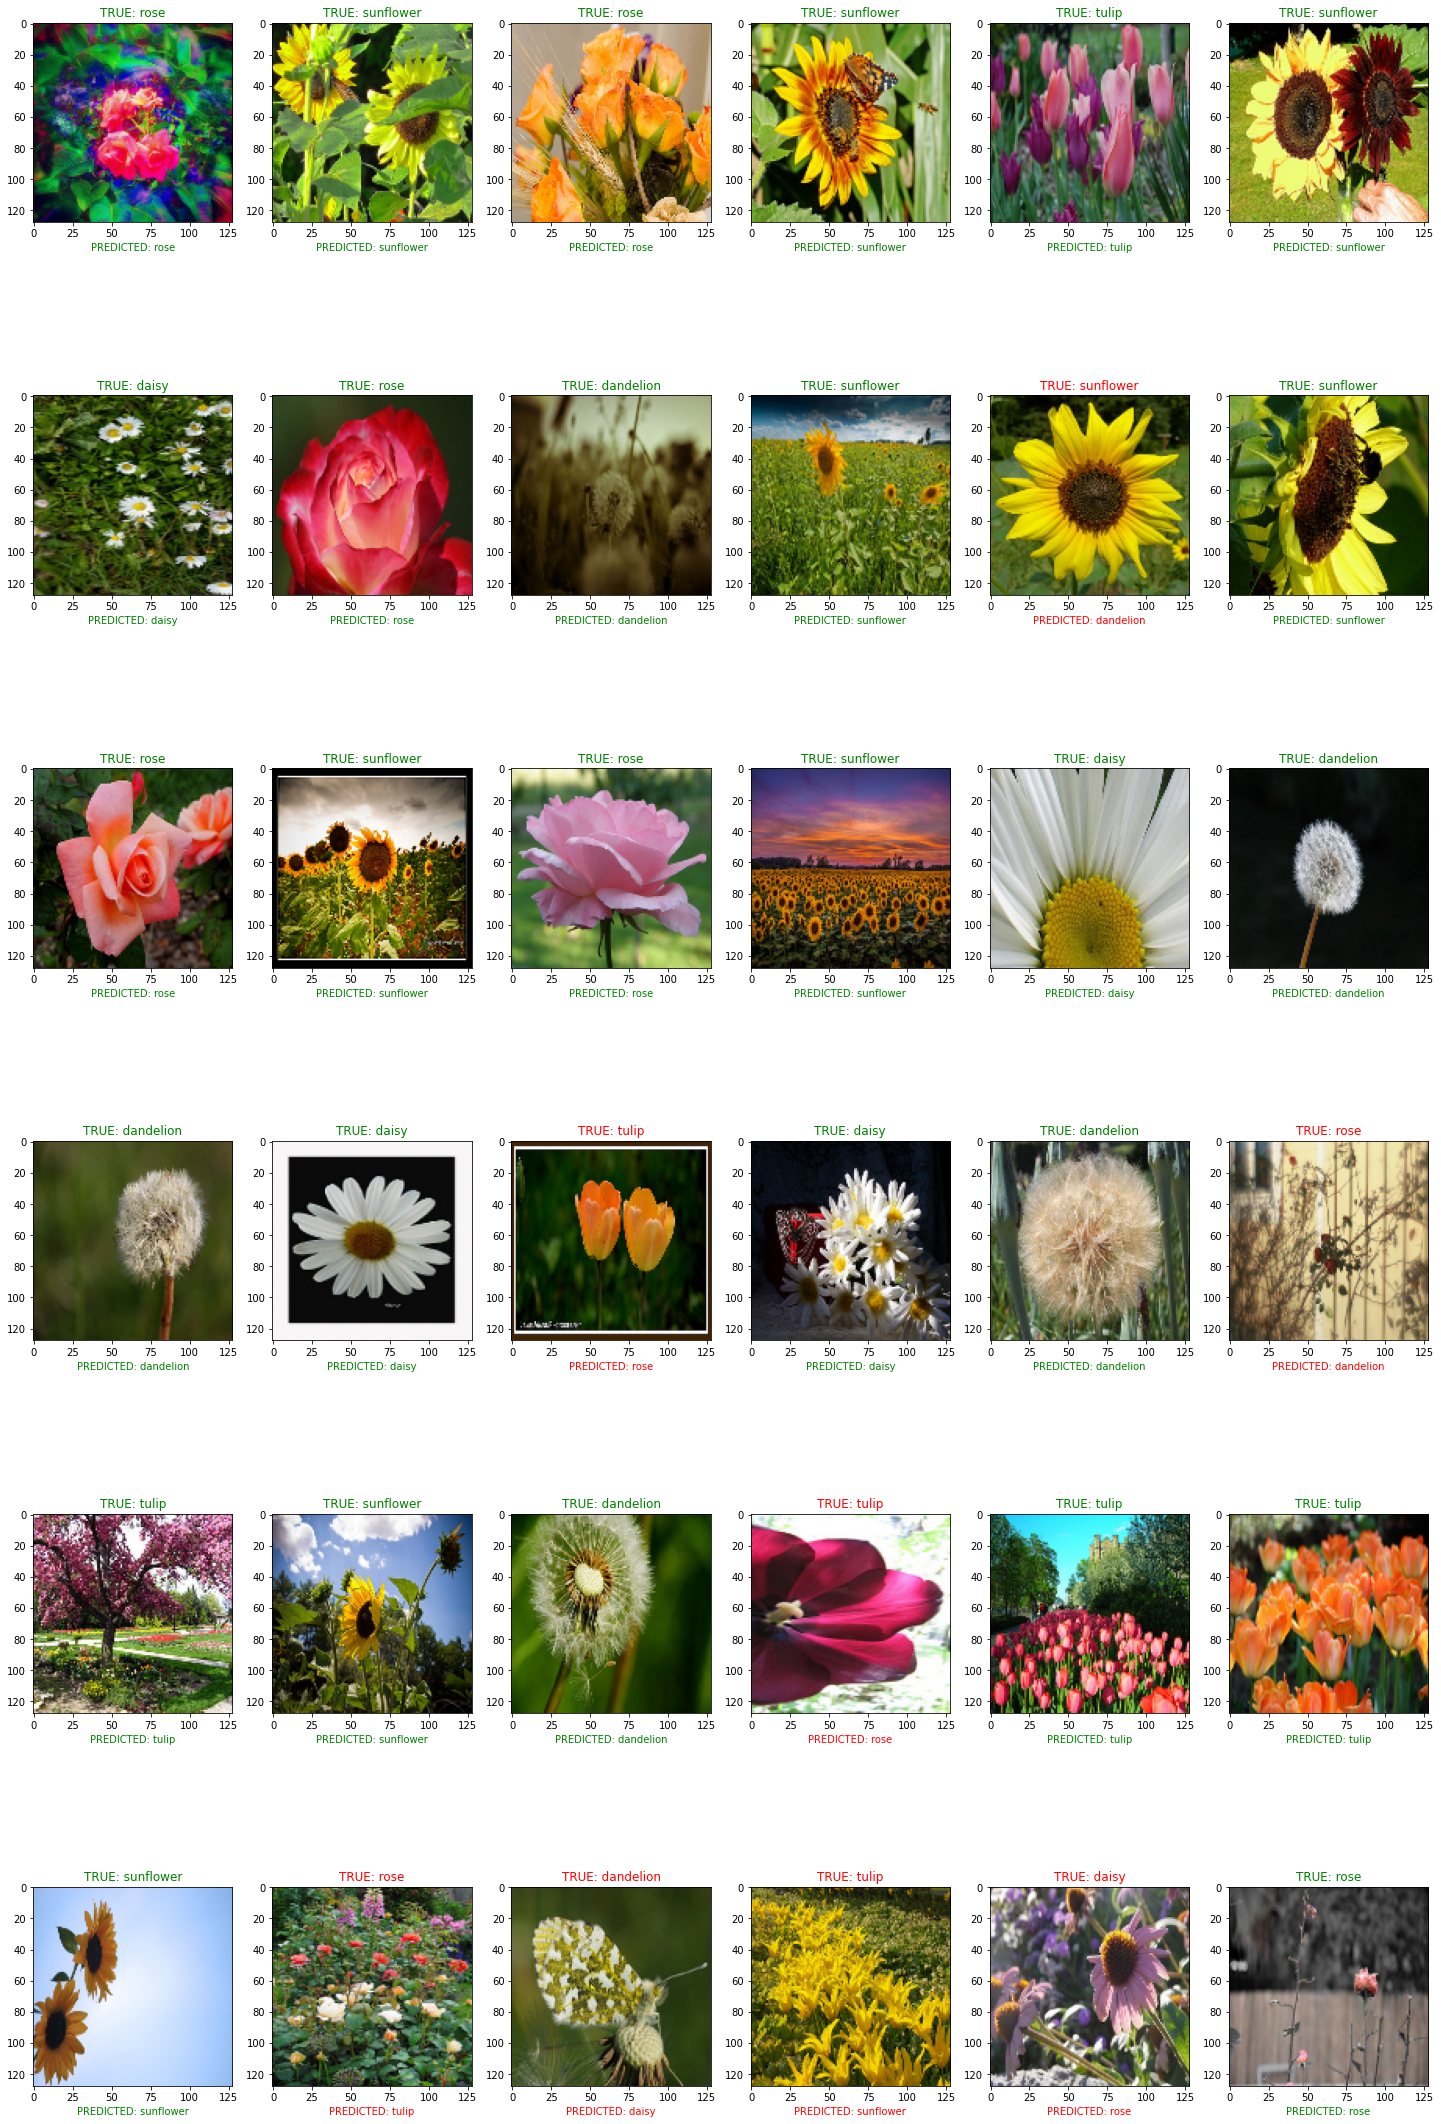

In [26]:
categories=np.sort(os.listdir(data_path))
fig,ax=plt.subplots(6,6,figsize=(25,40))
for i in range(6):
  for j in range(6):
    k=int(np.random.random_sample()*len(X_test))
    if (categories[np.argmax(y_test[k])]==categories[np.argmax(model.predict(X_test)[k])]):
      ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
      ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
      ax[i,j].imshow(np.array(X_test)[k].reshape(128, 128, 3), cmap='gray')
    else:
      ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
      ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
      ax[i,j].imshow(np.array(X_test)[k].reshape(128, 128, 3), cmap='gray')

From this we could infer that our model has predicted alomost all except few.